# In the Wake of the Great Resignation: Predicting Employee Churn


## Exploratory Data Analysis

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split

In [55]:
employee = pd.read_csv('employee.csv')
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [7]:
# Check data size and type
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [15]:
# Check missing data
employee.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

#### There is no missing data


### Explore unique values in categorical variables

In [24]:
# Counts of unique values in Education
employee['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [25]:
# Counts of unique values in JoiningYear
employee['JoiningYear'].value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

In [26]:
# Counts of unique values in City
employee['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [27]:
# Counts of unique values in PaymentTier
employee['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

In [28]:
# Counts of unique values in Gender
employee['Gender'].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

In [30]:
# Counts of unique values in EverBenched
employee['EverBenched'].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

In [31]:
# Counts of unique values in ExperienceInCurrentDomain
employee['ExperienceInCurrentDomain'].value_counts()

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

In [64]:
# Counts of unique values in LeaveOrNot
employee['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

### Check outliers

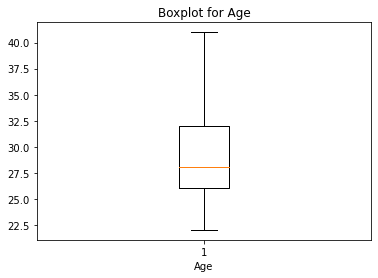

In [22]:
# Boxplot to observe ouliers for Age

fig = plt.figureSize = ((5,8))
plt.boxplot(employee['Age'])
plt.xlabel('Age')
plt.title('Boxplot for Age')
plt.show()

### Check for duplication

In [51]:
dups = employee.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 1889


In [61]:
duplicate_row = employee[dups]
duplicate_row

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


**<font color="red"> -->Large number of duplication. Could be due to synthetic values? or due to pre-process of balancing data? Keep or discard? </font>**

#### Display the summary for all the attributes simultaneously in a table . For quantitative attritbutes, it will display their mean, standard deviation and various quantiles (including minimum, median, and maximum) values. For qualitative attributes, it will display its number of unique values and the top (most frequent) values.

In [63]:
# Table of summary statistics 
employee.describe(include='all').round(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.00,4653,4653.00,4653.00,4653,4653,4653.00,4653.00
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.06,NaN,2.70,29.39,NaN,NaN,2.91,0.34
std,NaN,1.86,NaN,0.56,4.83,NaN,NaN,1.56,0.48
min,NaN,2012.00,NaN,1.00,22.00,NaN,NaN,0.00,0.00
25%,NaN,2013.00,NaN,3.00,26.00,NaN,NaN,2.00,0.00
50%,NaN,2015.00,NaN,3.00,28.00,NaN,NaN,3.00,0.00
75%,NaN,2017.00,NaN,3.00,32.00,NaN,NaN,4.00,1.00


### Transform data 

#### Transform JoiningYear into Duration. With the latest data collected was in 2018, the task is to predict  whether the employees will churn in the next two years assuming it would be in 2020. 

In [66]:
employee['Duration'] = 2020 - employee['JoiningYear']
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Duration
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,3
1,Bachelors,2013,Pune,1,28,Female,No,3,1,7
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,6
3,Masters,2016,Bangalore,3,27,Male,No,5,1,4
4,Masters,2017,Pune,3,24,Male,Yes,2,1,3


In [67]:
# Counts of unique values in Duration
employee['Duration'].value_counts()

3    1108
5     781
6     699
7     669
4     525
8     504
2     367
Name: Duration, dtype: int64

### Explore variable relationships

In [68]:
print('Correlation:')
employee.corr()

Correlation:


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Duration
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705,-1.000000
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638,0.096078
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126,-0.013165
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504,0.036525
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000,-0.181705
Duration,-1.000000,0.096078,-0.013165,0.036525,-0.181705,1.000000


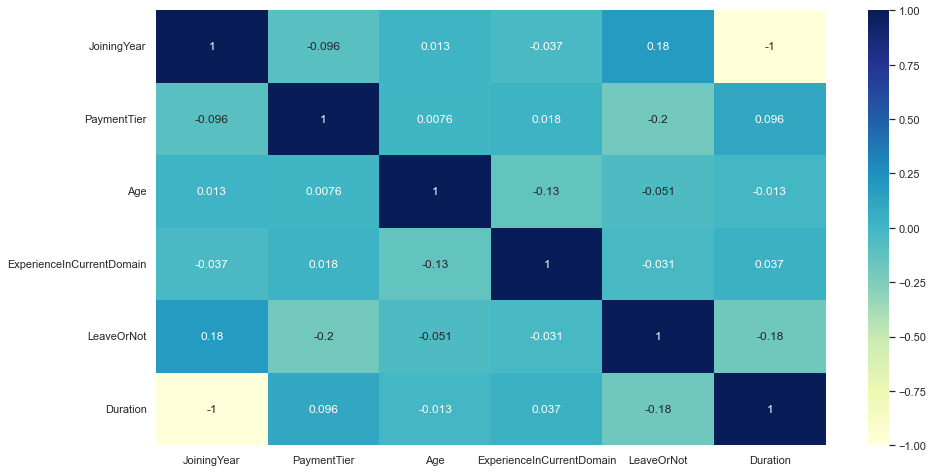

In [69]:
# plot the heatmap and annotation on it
#Correlation matrix 
corr_matrix_test = employee.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_matrix_test, cmap="YlGnBu", annot=True)
plt.show()

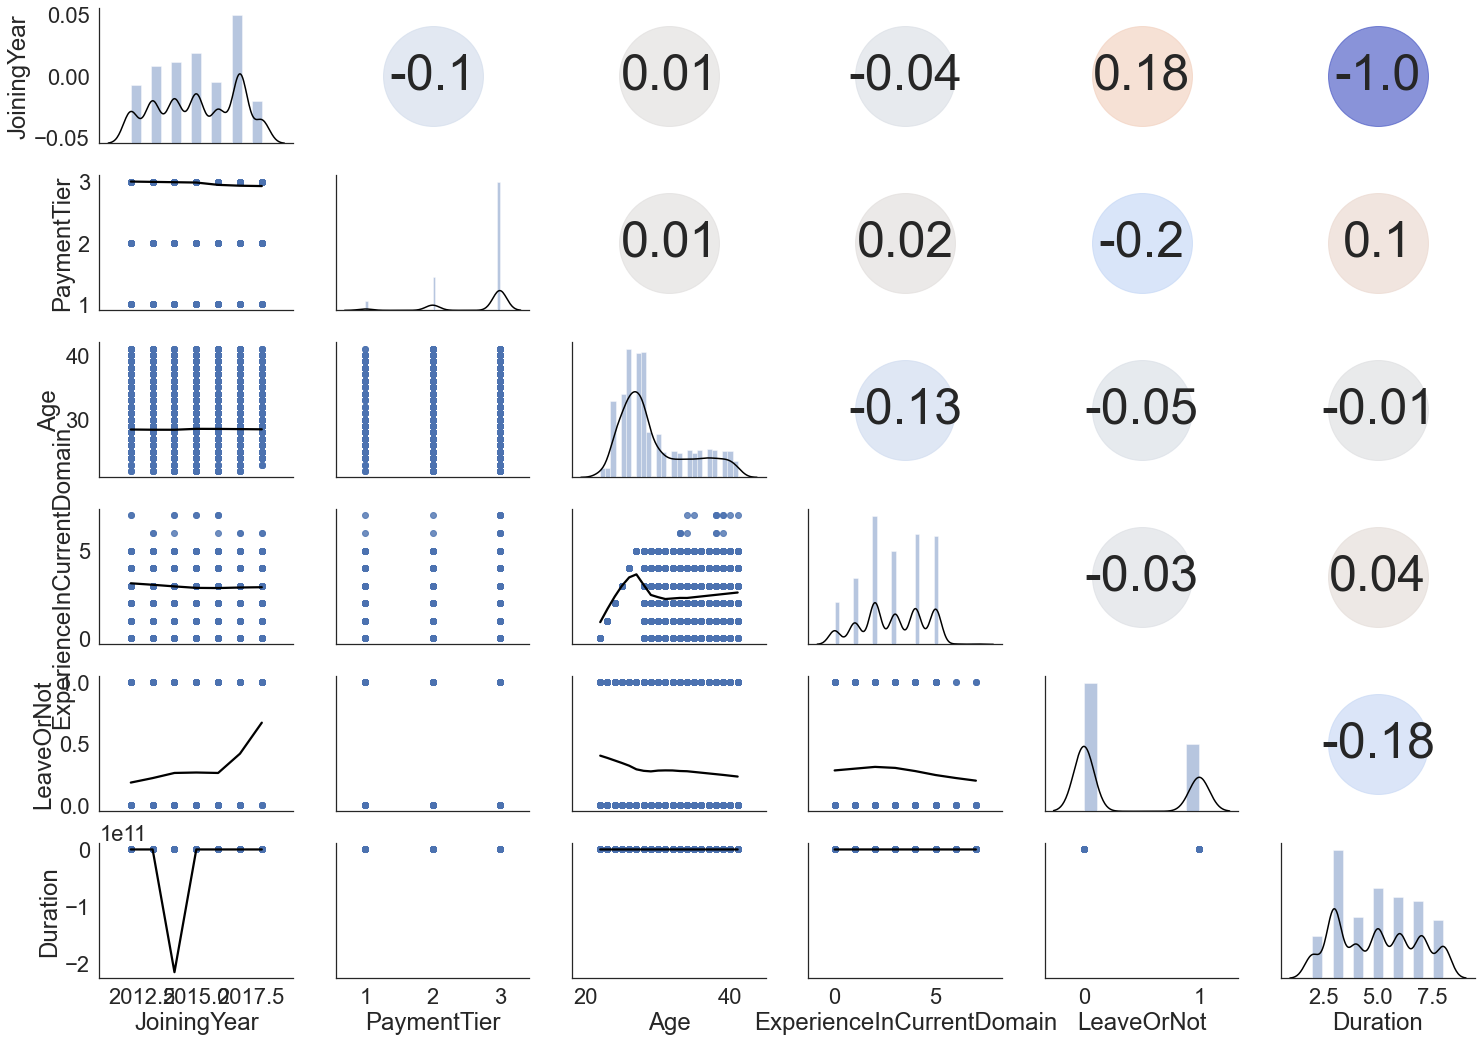

In [73]:
#Create Plot and correlation matrix for selected feature
def corrdot(*args, **kwargs):
    employee = round (args[0].corr(args[1], 'pearson'), 2)
    corr_text = f"{employee:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = 10000
    ax.scatter([.5], [.5], marker_size, [ employee], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = 50
    ax.annotate( employee, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=2.0)
g = sns.PairGrid( employee, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)
plt.show()

#### Histogram of Education with overlay of LeaveOrNot

Contingency table:
LeaveOrNot     0     1
Education             
Bachelors   2472  1129
Masters      447   426
PHD          134    45
Normalized contingency table:
LeaveOrNot         0         1
Education                     
Bachelors   0.686476  0.313524
Masters     0.512027  0.487973
PHD         0.748603  0.251397


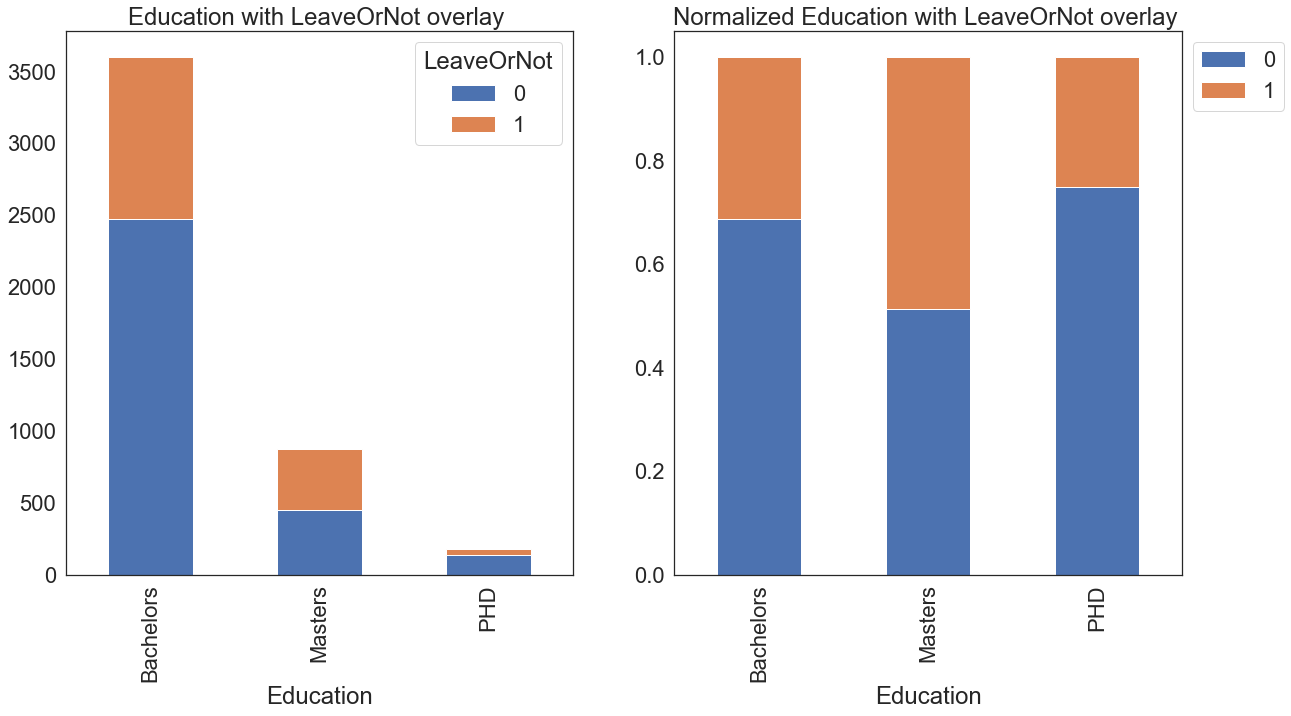

In [140]:
crosstab = pd.crosstab(employee["Education"], employee["LeaveOrNot"])
print('Contingency table:')
print(crosstab)

#creat a normalized contingency table by divide each cell by its row total
crosstab_norm = crosstab.div(crosstab.sum(1), axis=0)
print('Normalized contingency table:')
print(crosstab_norm)

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = (20, 20)

crosstab.plot.bar(ax=ax1, stacked=True)
ax1.set_title("Education with LeaveOrNot overlay ")

crosstab_norm.plot.bar(ax=ax2, stacked = True)
ax2.set_title("Normalized Education with LeaveOrNot overlay ")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

#### Histogram of Everbenched with overlay of LeaveOrNot

Contingency table:
LeaveOrNot      0     1
EverBenched            
No           2792  1383
Yes           261   217
Normalized contingency table:
LeaveOrNot          0         1
EverBenched                    
No           0.668743  0.331257
Yes          0.546025  0.453975


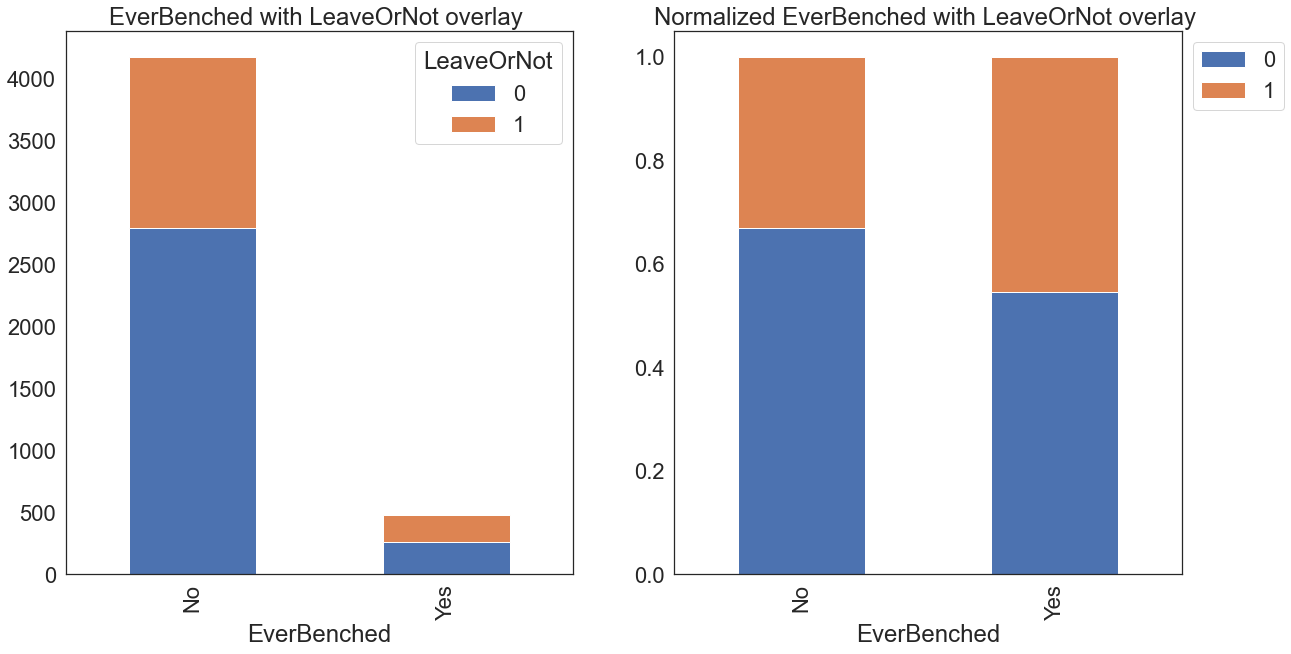

In [131]:
crosstab2 = pd.crosstab(employee["EverBenched"], employee["LeaveOrNot"])
print('Contingency table:')
print(crosstab2)

#creat a normalized contingency table by divide each cell by its row total
crosstab_norm2 = crosstab2.div(crosstab2.sum(1), axis=0)
print('Normalized contingency table:')
print(crosstab_norm2)

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = (20,20)

crosstab2.plot.bar(ax=ax1, stacked=True)
ax1.set_title("EverBenched with LeaveOrNot overlay ")

crosstab_norm2.plot.bar(ax=ax2, stacked = True)
ax2.set_title("Normalized EverBenched with LeaveOrNot overlay ")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

#### Histogram of Age with overlay of LeaveOrNot

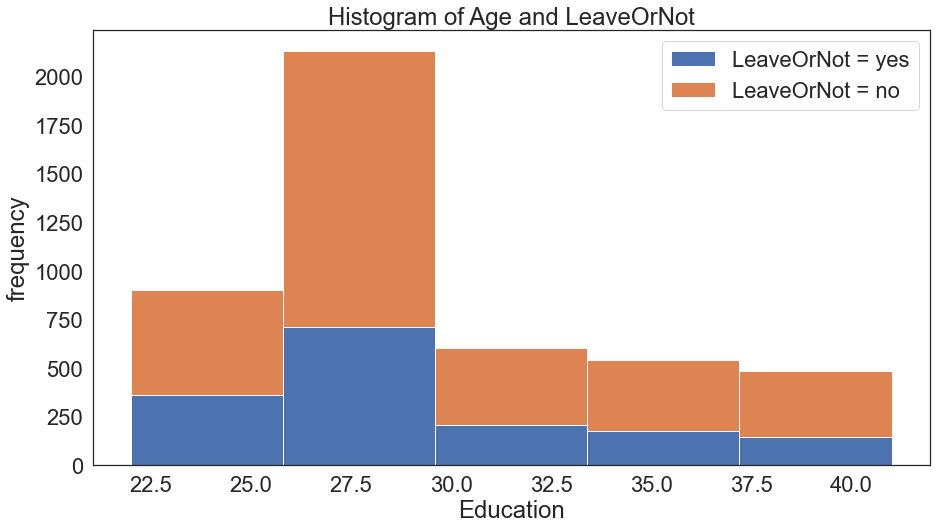

In [80]:
#separate Age according to LeaveOrNot
employee_y =employee[employee.LeaveOrNot == 1]['Age']
employee_n = employee[employee.LeaveOrNot == 0]['Age']

#creat histogram of the above variable
(n, bins, patches)= plt.hist([employee_y,employee_n], bins= 5, stacked= True)
plt.xlabel('Education')
plt.ylabel('frequency')
plt.legend(['LeaveOrNot = yes', 'LeaveOrNot = no'])
plt.title('Histogram of Age and LeaveOrNot')
plt.show()

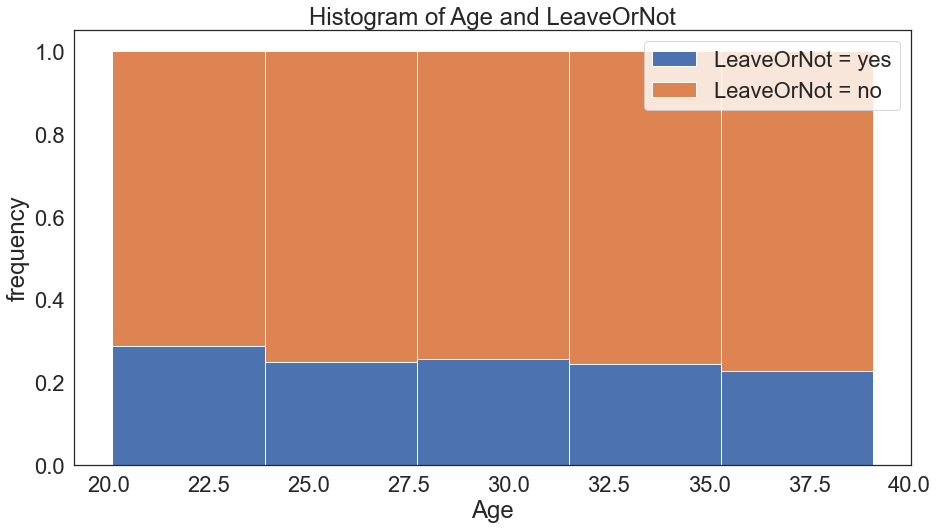

In [81]:
n_table = np.column_stack((n[0], n[1])) #create two column matrix (see book_practice file)
n_norm = n_table/ n_table.sum (axis =1)[:, None]
ourbins = np.column_stack((bins[0:5], bins[1:6]))
p1 = plt.bar(x= ourbins[:,0], height = n_norm [:,0], \
             width = ourbins[:,1] - ourbins[:,0])
p2 = plt.bar(x= ourbins[:,0], height = n_norm [:,1], \
             width = ourbins[:,1] - ourbins[:,0], bottom = n_norm[:,0])
plt.xlabel('Age')
plt.ylabel('frequency')
plt.legend(['LeaveOrNot = yes', 'LeaveOrNot = no'])
plt.title('Histogram of Age and LeaveOrNot')
plt.show()

In [ ]:
#separate duration according to LeaveOrNot
employee_y =employee[employee.LeaveOrNot == 1]['duration']
employee_n = employee[employee.LeaveOrNot == 0]['duration']